# Regression model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from relife.models import ProportionalHazard, Weibull, Gompertz
from relife.datasets import load_insulator_string

In [2]:
cp = 1
cf = 5
discounting_rate = 0.05

time, event, entry, *covar = load_insulator_string()
print(time)
print(covar)
covar = np.column_stack(covar)

[70.  30.  45.  ...  8.8  7.6 53. ]
[array([0.49, 0.76, 0.43, ..., 1.12, 1.19, 0.35], shape=(12000,)), array([1.69, 1.79, 1.61, ..., 1.76, 1.74, 1.61], shape=(12000,)), array([0.24, 0.39, 0.25, ..., 0.21, 0.24, 0.28], shape=(12000,))]


In [3]:
distrib = Weibull(5, 0.03)

In [4]:
ProportionalHazard(distrib, (1, 2, 3)).hf(2, np.random.random((10, 3)))

array([[2.58066487e-05],
       [5.98169232e-04],
       [1.15682427e-05],
       [1.25760368e-05],
       [2.06904973e-05],
       [1.87049194e-04],
       [4.02889883e-04],
       [1.12689667e-05],
       [4.82611814e-05],
       [6.13777476e-06]])

In [5]:
ph = ProportionalHazard(Gompertz()).fit(time, covar, event=event, entry=entry)

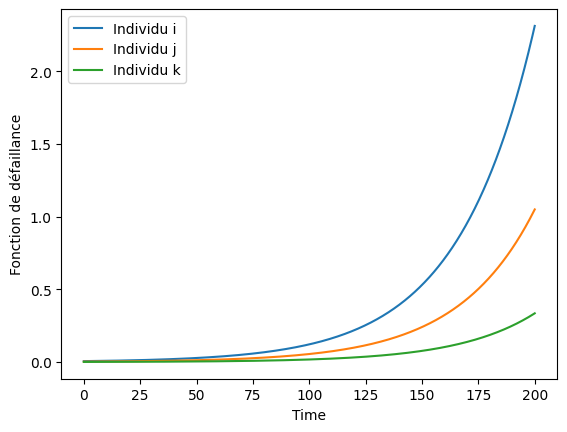

In [6]:
# plot hazard function for some individuals
i, j, k = 12, 1073, 7999
t = np.linspace(0, 200, num=1000)
plt.plot(t, ph.hf(t, covar)[i], label="Individu i")
plt.plot(t, ph.hf(t, covar)[j], label="Individu j")
plt.plot(t, ph.hf(t, covar)[k], label="Individu k")
plt.xlabel("Time")
plt.ylabel("Fonction de défaillance")
plt.legend()
plt.show()

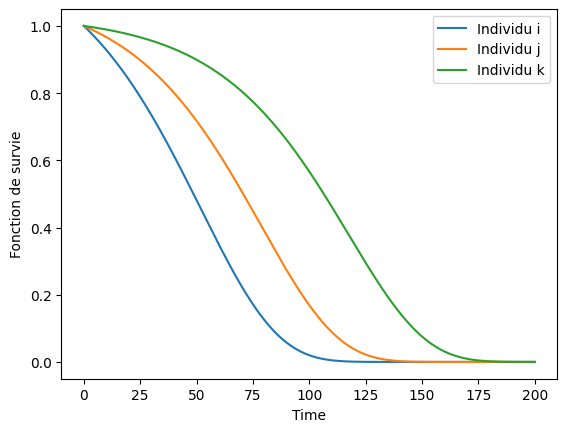

In [7]:
# plot survival functions of some individuals
plt.plot(t, ph.sf(t, covar)[i], label="Individu i")
plt.plot(t, ph.sf(t, covar)[j], label="Individu j")
plt.plot(t, ph.sf(t, covar)[k], label="Individu k")
plt.xlabel("Time")
plt.ylabel("Fonction de survie")
plt.legend()
plt.show()

In [8]:
distri = ph.get_distribution(covar[[i, j, k]])

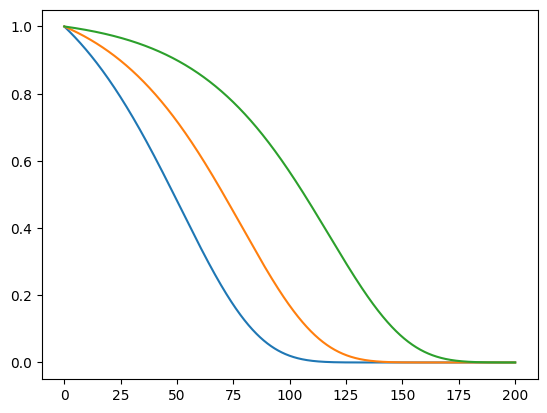

In [9]:
plt.plot(t, distri.sf(t)[0], label="Individu i")
plt.plot(t, distri.sf(t)[1], label="Individu j")
plt.plot(t, distri.sf(t)[2], label="Individu k")

In [10]:
from relife.models import LeftTruncatedModel

left_truncated_distri = LeftTruncatedModel(distri)

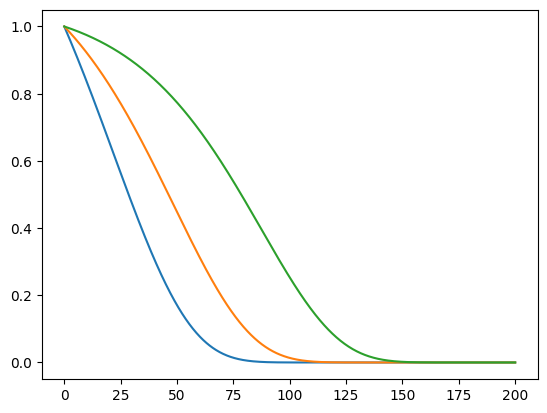

In [11]:
a0 = np.array([30, 30, 30]).reshape(-1,1)
plt.plot(t, left_truncated_distri.sf(t, a0)[0], label="Individu i")
plt.plot(t, left_truncated_distri.sf(t, a0)[1], label="Individu j")
plt.plot(t, left_truncated_distri.sf(t, a0)[2], label="Individu k")

In [12]:
from relife.models import AgeReplacementModel

ar_distri = AgeReplacementModel(distri)

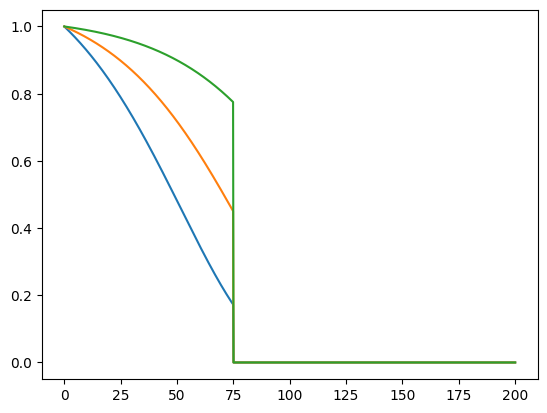

In [13]:
ar = np.array([75, 75, 75]).reshape(-1,1)
plt.plot(t, ar_distri.sf(t, ar)[0], label="Individu i")
plt.plot(t, ar_distri.sf(t, ar)[1], label="Individu j")
plt.plot(t, ar_distri.sf(t, ar)[2], label="Individu k")

## Politique de remplacement par âge dans un modèle à covariables

Il est possible de fitter une politique de remplacement par âge d'après un modèle proportionnel. Il suffit de passer les covariables dans l'argument `model_args` de la classe AgeReplacementPolicy.

In [14]:
# Calculons la politique et l'âge de remplacement pour les individus i, j, k définis ci-dessus:
policy_ph = AgeReplacementPolicy(
    ph, cf, cp, discounting_rate=discounting_rate, model_args=(covar[[i, j, k]],), nb_assets=3
).fit()
print(policy_ph.ar)

NameError: name 'AgeReplacementPolicy' is not defined